<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** 
- Bryan Azahel Juárez Pineda.
- Rodrigo Martínez Gallardo Bertoldi

**Fecha:** 08 de marzo del 2021.

**Expediente** : 
- 722176.
- 
    
**Profesor:** Oscar David Jaramillo Zuluaga.

# Tarea 6: Clase 10.

[Liga al repositorio](https://github.com/Bryan722176/ProyectoConjunto_RMartinez_BAJuarez)

### Proyecto Conjunto.
> Instrucciones: Cada estudiante debe proponer una solución óptima a los problemas planteados a continuación.

# Tarea 6
Partiendo que se desea generar variables aleatorias para la siguiente función de densidad
$$f(x)=30(x^2-2x^3+x^4)$$
Responda los siguientes literales:
1. Usar como función que mayora a $f(x)$ a $t(x)=a \sin(\pi x)$ donde a es el máximo de la función $f(x)$ y graficarlas en una misma gráfica, para validar que en realidad si cumple la condición $t(x)\geq f(x)$.
2. Encontrar la función de densidad $g(x)$ según lo visto en clase. Reportar todos los cálculos realizados para encontrar dicha función usando Markdown (Latex).
3. Usar la función encontrada en el punto 2 y utilizar el método de la transformada inversa visto en la clase 9, para generar variables aleatorias que sigan la distribución $g(x)$. **Nota:** Recuerde que el método de la transformada inversa funciona con la distribución de probabilidad acumulada y no con su densidad. Nuevamente similar al punto anterior reportar todos los cálculos usando Markdown (Latex). 
4. Según el punto 3, generar 10000 puntos aleatorios que sigan la distribución $g(x)$ y comparar con su histograma para validar que los puntos generados siguen la distribución deseada. El resultado debe ser como sigue:
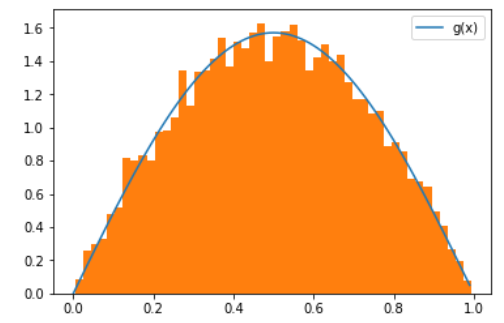

5. Genere 500 puntos aleatorios usando el método de aceptación y rechazo y las funciones $f(x)$ y $t(x)$ para validar que todos los cálculos anteriores están correctamente realizados. El resultado debe de ser como sigue:
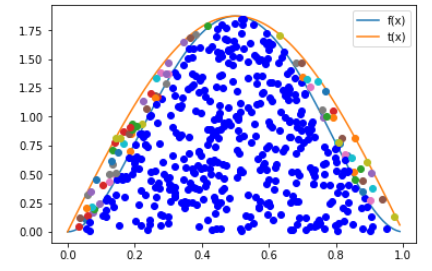

6. Comparar el porcentaje de puntos de aceptación cuando se usa $t(x)$ constante y $t(x)$ un pulso senoidal. Concluir

7. Genere una variable aleatoria $X$ a partir de la siguiente PDF
$$f(x)=20x(1-x)^3$$ 
usando el método de aceptación y rechazo

8. Seguir un procedimiento similar al mostrado cuando se generó una distribución binomial, pero en esta caso genere un código que genere variables aletorias Poisson cuya función de distribución de probabilidad esta dada por:
>$$P(k,\lambda)=\frac{e^{-\lambda}(\lambda)^k}{k!}$$
    
> Demuestre matemáticamente que 
> $$P(k+1)=\frac{\lambda}{k+1}P(k)$$
> y a partir de esta relación genere variables aletorias que distribuyen poisson usando el método de la transformada inversa.

Enlace: https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_Poisson

### _Solución Bryan._

In [1]:
# Importamos líbrerias a utilizar.
import numpy as np
from scipy import optimize
import pandas as pd
import sympy as sym
import matplotlib.pyplot as plt
%matplotlib inline

#### Solución ejercicio 1.

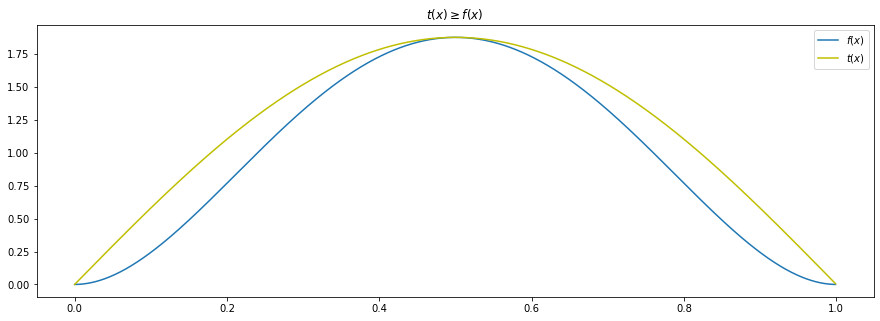

In [2]:
# Generamos un vector donde tendremos el valor correspondiente a x. 1000 valores.
x1 = np.arange(0,1,0.001)

# Definimos f(x).
f = lambda x: 30*(x**2 - 2*x**3 + x**4)

# Definimos el valor de 'a' como el máximos de la función f(x).
a = f(optimize.fmin(lambda x:-f(x), 0, disp=False))
# Definimos t(x).
t = lambda x: a*np.sin(np.pi*x)

# Graficamos las funciones generadas.
plt.figure(figsize=[15,5])
plt.plot(x1, f(x1), label='$f(x)$')
plt.plot(x1, t(x1), 'y', label='$t(x)$')
plt.title('$t(x) \geq f(x)$')
plt.legend();

Al observar nuestra gráfica podemos darnos cuenta que en efecto se cumple la relación donde $t(x) \geq f(x)$.

#### Solución ejercicio 2.

Se pide encontrar la función de densidad de probabilidad correspondiente a la función $t(x)$, es decir, buscamos $g(x)$.

Para comenzar sabemos que $t(x)$ no representa una función de densidad de probabilidad esto porque su integral de $-\infty$ a $\infty$ es mayor a $1$. Entonces con este preambulo podemos definir $g(x)$ de la siguiente manera:
$$ g(x) = \frac{t(x)}{c} $$
Donde $c = \int_{-\infty}^{\infty} t(x)\cdot dx$

De esta manera al integrar $g(x)$ obtenemos la siguiente expresión:
$$ \int_{-\infty}^{\infty} g(x)\cdot dx = \frac{\int_{-\infty}^{\infty} t(x)\cdot dx}{\int_{-\infty}^{\infty} t(x)\cdot dx} = 1 $$

Por lo tanto $g(x)$ **SI** es una función de distribución de probabilidad.

Con esto en cuenta buscaremos $g(x)$ conociendo que $t(x)$ se define por la siguiente ecuación:
$$ t(x) = asin(\pi x) $$

Por lo tanto:
$$ g(x) = \frac{asin(\pi x)}{c} $$

Donde el intervalo de integración para nuestra $c$ está definido en el dominio que nos interesa estudiar, es decir, $[0,1]$. Entonces obtenemos la siguiente expresión:
$$ g(x) = \frac{asin(\pi x)}{a \int_{0}^{1} sin(\pi x)\cdot dx} = \frac{sin(\pi x)}{\int_{0}^{1} sin(\pi x)\cdot dx} $$

Ahora nos enfocaremos en resolver la integral definida en el denominador de la expresión anterior.
$$ \int_{0}^{1} sin(\pi x)\cdot dx $$

Para resolver la integral, utilizaremos integración por sustitución, donde definiremos los siguientes parámetros: 
$$v = \pi x$$ 
$$dx = \frac{dv}{\pi}$$

Sutituyendo en nuestra integral obtenemos la siguiente expresión:
$$ \int_{0}^{1} sin(v)\cdot \frac{dv}{\pi} = \frac{1}{\pi} \int_{0}^{1} sin(v)\cdot dv $$

Integrando, obtenemos lo siguiente:
$$ -\frac{1}{\pi}\cdot\big[cos(v)\big]_{0}^{1} $$

Recordando el parámetro $v = \pi x$
$$ -\frac{1}{\pi}\cdot\big[cos(\pi x)\big]_{0}^{1} = \frac{2}{\pi} $$

Por lo tanto:
$$ g(x) = \frac{sin(\pi x)}{\frac{2}{\pi}} = \frac{\pi}{2}\cdot[sin(\pi x)] $$

#### Solución ejercicio 3.

Ya con $g(x)$ definida, para encontrar un generador de variables aleatorias que distribuyan como $g(x)$, utilizaremos el método de la transformada inversa.

Recordando lo que este método nos dice, debemos igualar la función de distribución de probabilidad acumulada a un uniforme entre $[0,1]$ para de esta manera encontrar la función inversa y definir como se generan las variables aleatorias.

En este caso en particular lo que tenemos es $g(x)$ que es la función de distribución de probabilidad y necesitamos $G(x)$, es decir, la función de distribución de probabilidad acumulada, para ello efectuaremos lo siguiente:
$$ G(x) = \int_{0}^{x} g(x)\cdot dx $$

Trasladandolo a términos del problema:
$$ G(x) = \int_{0}^{x} \frac{\pi}{2}\cdot[sin(\pi x)]\cdot dx = \frac{\pi}{2}\int_{0}^{x}[sin(\pi x)]\cdot dx  $$

Entonces quedamos interesados en resolver la integral definida anteriormente, la resolveremos también por el método de sustitución, donde tendremos los siguientes parámetros:
$$ v = \pi x $$
$$ dx = \frac{dv}{\pi} $$

Observamos que la integral es la misma planteada en el ejercicio 2, solo variando los límites de integración. De manera que la solución a la integral queda planteada de la siguiente manera:
$$ -\frac{1}{\pi}\cdot\big[cos(\pi x)\big]_{0}^{x} $$

Evaluando, obtenemos la siguiente expresión:
$$ \frac{1+cos(\pi x)}{\pi} $$

De manera que $G(x)$ se define de la siguiente manera:
$$ G(x) = \frac{\pi}{2} \big(\frac{1+cos(\pi x)}{\pi}\big) = \frac{1+cos(\pi x)}{2} $$

Ahora ya con nuestra función de distribución de probabilidad acumulada definida, podemos comenzar con el método de la transformada inversa, igualando $G(x)$ a un uniforme $U \sim \text{Uniforme[0,1]}$
$$ \frac{1+cos(\pi x)}{2} = U $$

Encontramos la función inversa, y obtenemos la siguiente expresión:
$$ X = \frac{cos^{-1}(2u - 1)}{\pi} $$

$$\text{donde } X \sim g(x)$$

#### Solución ejercicio 4.

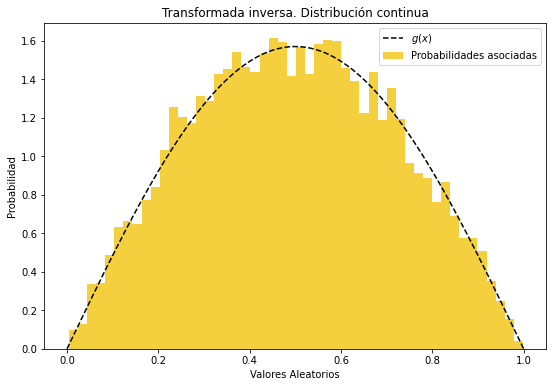

In [3]:
# Comenzamos definiendo una función donde generaremos nuestras variables aleatorias.
def aleatorias(N:'Número de muestras a generar'):
    return ((np.arccos((2*np.random.random(N)) - 1))/(np.pi))

# Generamos 10,000 muestras
N_x = 10000
x2 = aleatorias(N_x)

# Para poder comprobar la efectividad del generador de variables aleatorias, simularemos la distribución g(x).
x3 = np.arange(0, 1, 0.0001)
g_x = (np.pi / 2) * np.sin(np.pi * x3)

# Graficamos tanto nuestra distribución como las variables aleatorias generadas.
plt.figure(figsize=[9,6])
plt.plot(x3,g_x,'k--', label='$g(x)$')
plt.hist(x2, bins=50, color='#F4D03F', density=True, label='Probabilidades asociadas')
plt.xlabel('Valores Aleatorios')
plt.ylabel('Probabilidad')
plt.title('Transformada inversa. Distribución continua')
plt.legend()
plt.show()

Observando la gráfica anterior podemos darnos cuenta de que efectivamente las variables aleatorias si se distribuyen como $g(x)$.

#### Solución ejercicio 5.

In [4]:
# Primero definiremos la función programada en clase donde evaluamos y graficamos el método de aceptación y rechazo.
def plot_acep_rechazo(R2:'Variables distruidas U~U(0,1)',
                      R1:'Variables distribuidas como g(x)',
                      f:'función objetivo a generar',
                      t:'función que mayora a f'):
    
    # Definimos f y t evaluadas en nuestra variables aleatorias con distribución g(x)
    f_x = f(R1)
    t_x = t(R1)
    condition = R2 * t_x <= f_x
    
    # Gráfica de los puntos aceptados y los puntos rechazados.
    [plt.plot(R1[i],R2[i]*t_x[i],'ob') if condition[i] else plt.plot(R1[i],R2[i]*t_x[i],'o') \
         for i in range(len(R1))] 
    plt.show()

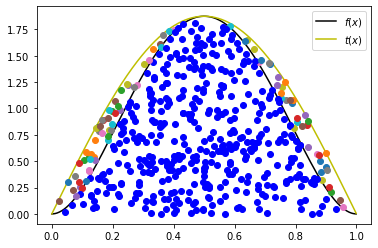

In [5]:
# Ahora, ya con la función definida ingresamos los parámetros a la función.
# Comenzamos con la cantidad de muestras.
N_muestras = 500

# Definimos R2 y R1
R2 = np.random.rand(N_muestras)
R1 = aleatorias(N_muestras)

# Con la intención de visualizar si los datos son correctos generaremos en la misma gráfica las funciones f(x) y t(x).
# Parámetro x 
x4 = np.arange(0,1,0.001)

# Gráfica de funciones.
plt.plot(x4, f(x4), 'k-', label='$f(x)$')
plt.plot(x4, t(x4), 'y-', label='$t(x)$')
plt.legend()

# Los parámetros f y t ya los tenemos definidos, por lo tanto ya podemos graficar el método.
plot_acep_rechazo(R2, R1, f, t)
plt.show()

A simple vista podemos observar que en efecto, el método de aceptación y rechazo parece **SI** generar una buena cantidad de valores aleatorias, además vemos como la función $t(x)$ estuvo muy bien definida.

#### Solución ejercicio 6.

In [6]:
# Para comparar el porcentaje de valores aceptados lo primero será definir una función que almacene los valores aceptados
def values_acep_rechazo(R2:'Variables distruidas U~U(0,1)',
                        R1:'Variables distribuidas como g(x)',
                        f:'función objetivo a generar',
                        t:'función que mayora a f'):
    
    # Definimos f y t evaluadas en nuestra variables aleatorias con distribución g(x)
    f_x = f(R1)
    t_x = t(R1)
    condition = R2 * t_x <= f_x
    
    # Almacenamos en un vector los valores aceptados
    values = [R1[i] for i in range(len(R1)) if condition[i]]
    return values

In [7]:
# Ahora ya podemos comparar los valores aceptados
# Comenzamos para un t(x) con pulso senoidal. Utilizaremos los mismos parámetros que para el ejercicio anterior 500 muestras.
acep_senoidal = len(values_acep_rechazo(R2, R1, f, t)) / N_muestras
print(f'La cantidad de muestras aceptadas para t(x) con pulso senoidal es de: {acep_senoidal * 100}%')

# Ahora para un t(x) constante.
# Anteriormente definimos 'a' como el valor máximo de la función f(x), por lo tanto ese será el valor de t(x) constante.
# Solamente cambiaremos el parámetro R1, el cual se va a distribuir de manera uniforme entre [0,1] ahora.
t_c = lambda x: a * np.ones(len(x))
R1_c = np.random.uniform(0, 1, N_muestras)
acep_constante = len(values_acep_rechazo(R2, R1, f, t_c)) / N_muestras
print(f'La cantidad de muestras aceptadas para t(x) constante es de: {acep_constante * 100}%')

La cantidad de muestras aceptadas para t(x) con pulso senoidal es de: 82.0%
La cantidad de muestras aceptadas para t(x) constante es de: 66.8%


Resulta interesante observar como la definición de una función $t(x)$ lo más apegada a la función $f(x)$ ayudará a tener una tasa de aceptación más alta sobre las muestras generadas, esto en comparación con una $t(x)$ constante. Esto trasladandolo a temas de eficiencia computacional puede resultar en una diferencia significativa en el costo. Por lo tanto lo óptimo siempre será buscar una función $t(x)$ que se apegue lo más posible a $f(x)$, siempre cumpliendo con la desigualdad $t(x) \geq f(x)$.

#### Solución ejercicio 7.

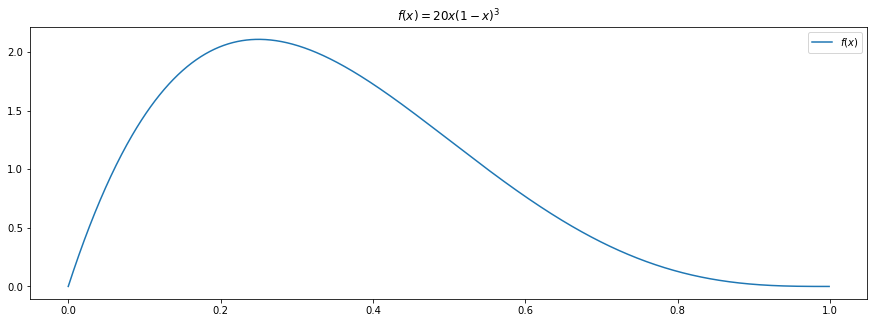

In [8]:
# Comenzamos visualizando graficamente nuestra función de distribución de probabilidad.
# Vector de x. Tomaremos 1000 valores
x5 = np.arange(0, 1, 0.001)

# Función f(x).
f2 = lambda x: (20*x)*(1-x)**3

# Graficamos la función.
plt.figure(figsize=[15,5])
plt.plot(x5, f2(x5), label='$f(x)$')
plt.title('$f(x) = 20x (1-x)^{3}$')
plt.legend();

De manera visual, observamos que la función tiene un comportamiento parecido a senoidal. Con este conocimiento buscaremos aproximar alguna función que supere a $f(x)$ pero que al mismo tiempo apegue su comportamiento lo más posible a la misma.

Después de varios intentos a prueba y error la función que se aproxima de buena manera a $f(x)$ se compone de la siguiente ecuación:
$$ t(x) = a\cdot sin\big(\sqrt{9.5x}\big) $$

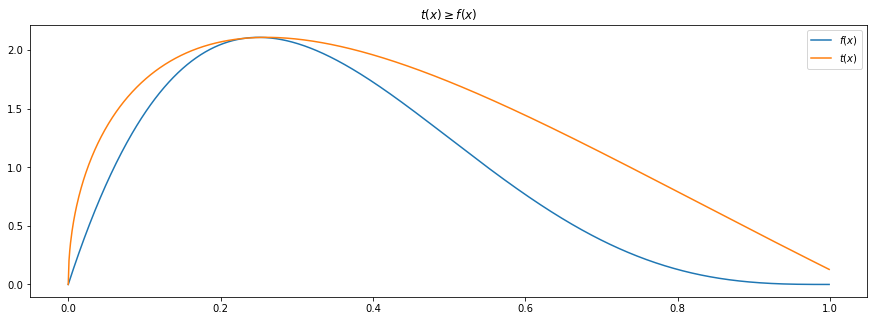

In [9]:
# Función t(x).
# Definimos el máximo de la función f(x).
max_f = f2(optimize.fmin(lambda x:-f2(x), 0, disp=False))

t2 = lambda x: max_f * np.sin(np.sqrt(9.5*x))

# Visualizamos graficamente su comportamiento
plt.figure(figsize=[15,5])
plt.plot(x5, f2(x5), label='$f(x)$')
plt.plot(x5, t2(x5), label='$t(x)$')
plt.title('$t(x) \geq f(x)$')
plt.legend();

Ya con $t(x)$ definida, recordemos que para poder utilizar el método de aceptación y rechazo debemos encontrar la función de distribución de probabilidad $g(x)$ que se define de la siguiente manera:
$$ g(x) = \frac{a\cdot sin\big(\sqrt{9.5x}\big)}{\int_{0}^{1} a\cdot sin\big(\sqrt{9.5x}\big) \cdot dx} =  \frac{sin\big(\sqrt{9.5x}\big)}{\int_{0}^{1} sin\big(\sqrt{9.5x}\big) \cdot dx}  $$

donde $a$ representa el máximo de $f(x)$.

Resolver para encontrar $G(x)$ y posteriormente despejar para encontrar la inversa de la función puede ser una tarea no tan sencilla. Por eso, se descartará la función. Sin embargo a continuación con cómputo simbólico se resolverá para encontrar $G(x)$.

In [11]:
# Resolución para encontrar G(x).
# Cálculo para definir la integral c en g(x).
x = sym.Symbol('x')
y = sym.sin(sym.sqrt(9.5*x))
int_1 = sym.integrate(y, (x,0,1))

# Cálculo de G(x)
y2 = sym.sin(sym.sqrt(9.5*x)) / int_1
int_2 = sym.integrate(y2, (x,0,x))
int_2

-0.98280763087753*sqrt(x)*cos(3.08220700148449*sqrt(x)) + 0.318864901158221*sin(3.08220700148449*sqrt(x))

Debido a las complicaciones anteriormente descritas cambiaremos nuestra función $t(x)$ a una constante. La cuál definiremos como el valor máximo de la función $f(x)$.

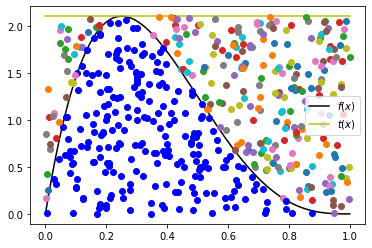

La cantidad de puntos aceptados con el método de aceptación y rechazo es de: 46.400000000000006%


In [12]:
# Comenzamos definiendo los parámetros para el método. 
# Debido a que t(x) es constante y está entre cero y uno tendremos que R1 distribuye de manera uniforme.
# Generaremos nuevamente 500 muestras.
t_c2 = lambda x: max_f * np.ones(len(x))

# Observamos la gráfica de los puntos aceptados
# Gráfica de funciones.
plt.plot(x5, f2(x5), 'k-', label='$f(x)$')
plt.plot(x5, t_c2(x5), 'y-', label='$t(x)$')
plt.legend(loc='best')
plot_acep_rechazo(R2, R1_c, f2, t_c2)

# Ahora conoceremos la cantidad de puntos aceptados.
puntos_aceptados = len(values_acep_rechazo(R2, R1_c, f2, t_c2)) / N_muestras
print(f'La cantidad de puntos aceptados con el método de aceptación y rechazo es de: {puntos_aceptados * 100}%')

#### Solución ejercicio 8.

Dada la función de distribución de probabilidad:
$$ P(k,\lambda)=\frac{e^{-\lambda}(\lambda)^k}{k!} $$

Buscamos demostrar que la probabilidad en el $k+1$ es igual a:
$$ P(k+1)=\frac{\lambda}{k+1}P(k) $$

Con la función de distribución de probabilidad podemos encontrar el valor de $k+1$ dado el valor de la probabilidad en $k$, de manera que escribimos la siguiente ecuación:
$$ \frac{P(k+1)}{P(k)} = \frac{\frac{e^{-\lambda}(\lambda)^k}{(k+1)!}}{\frac{e^{-\lambda}(\lambda)^k}{k!}} $$

Simplificando términos obtenemos la siguiente ecuación:
$$ \frac{P(k+1)}{P(k)} = \frac{\lambda}{k+1} $$

Por lo tanto:
$$ P(k+1) = \frac{\lambda}{k+1} \cdot P(k) $$

In [13]:
# Lo primero que haremos será definir las función descritas en clase.
# Tanto para generar las variables aleatorias a partir de una distribución dicreta.
# Como para graficar el histograma de las mismas.

# Función para generar variables aleatorias de una distribución discreta.
def Gen_distr_discreta(p_acum: 'P.Acumulada de la distribución a generar',
                       indices: 'valores reales a generar aleatoriamente',
                       N: 'cantidad de números aleatorios a generar'):
    
    U = np.random.rand(N)
    # Diccionario de valores aleatorios
    rand2reales = {i: idx for i, idx in enumerate(indices)}

    # Series de los valores aletorios
    y = pd.Series([sum([1 for p in p_acum if p < ui]) for ui in U]).map(rand2reales)
    
    return y

# Función para graficar histogramas de una distribución discreta.
def plot_histogram_discrete(distribucion:'señal de varibles aleatorias de un distribución DISCRETA dada',
                            title:'título del histograma',
                            label:'label del legend a aparecer en el gráfica',
                            densidad:'por defecto regresa el histograma en densidad'=True):
    # len(set(distribucion)) cuenta la cantidad de elementos distintos de la variable 'distribucion'
    plt.figure(figsize=[15,5])
    y, x = np.histogram(distribucion, bins=len(set(distribucion)), density=densidad) 
    plt.bar(x[1:], y, color='#F4D03F', align='center', label=label)
    plt.title(title)
    plt.legend()
    plt.show()

In [14]:
# Ahora ya con las funciones cargadas, ahora definiremos una función que calcule la probabilidad acumulada de
# la distribución de poisson.
def probacum_poisson(k, l):
    
    '''Esta función retorna el valor de la probabilidad acumulada'''
    
    # Definimos un vector de ceros donde almacenaremos los valores de las probabilidades.
    prob = np.zeros(k)
    # Inicializamos la primera posición del vector.
    prob[0] = np.exp(-l)
    
    # Utilizaremos una función que nos ayude a definir los valores del vector en las posiciones siguientes.
    # Recordemos que está definido por la siguiente expresión ((n-i)/(i+1)) * (p/(1-p)) * pi
    def probabilidad(k):
        nonlocal prob
        prob[k+1] = (l / (k+1)) * prob[k]
        
    # Llenamos el vector de manera iterativa para los n valores.
    [probabilidad(k) for k in range(k-1)]
    
    # Regresamos un vector con las probabilidades acumuladas.
    return np.cumsum(prob)

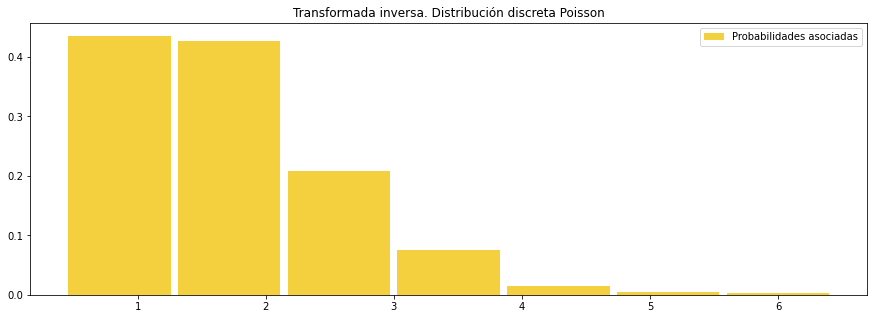

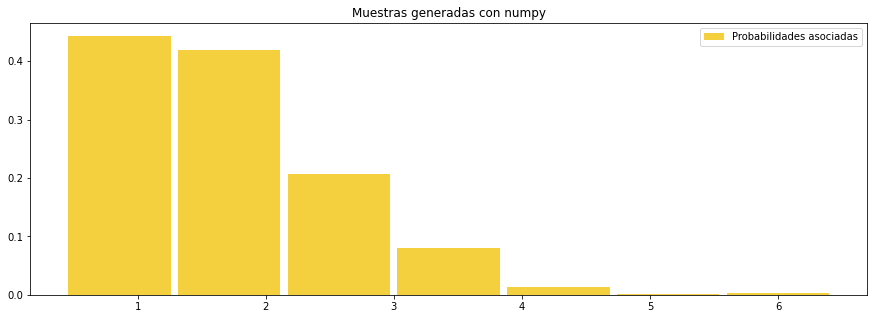

In [15]:
# Ahora ya con nuestra probabilidad acumulada, ahora generaremos las variables aleatorias.
# En este caso en particular trabajaremos con k=10 y lambda=1. Generaremos 1000 variables.
k = 10
l = 1
N_variables = 1000
indices = np.arange(0,k+1)

# Calculamos probabilidad acumulada.
prob_acumulada = probacum_poisson(k,l)

# Definimos las muestras aleatorias
var_poisson = Gen_distr_discreta(prob_acumulada, indices, N_variables)

# Ya con las muestras aleatorias generadas, graficaremos el histograma correspondiente.
plot_histogram_discrete(var_poisson, 'Transformada inversa. Distribución discreta Poisson', 'Probabilidades asociadas',
                        True)

# A manera de comprobación compararemos el resultado con las variables generadas por python
# Definimos los valores para la distribución con python.
prob_numpy = np.random.poisson(l,N_variables)

# Graficamos las muestras generadas por numpy.
plot_histogram_discrete(prob_numpy, 'Muestras generadas con numpy', 'Probabilidades asociadas', True)

Podemos observar a simple vista que el comportamiento es muy similar, con lo cual podemos concluir que el proceso de generación de variables aleatorias fue correcto.

### _Solución Rodrigo._

1. Usar como función que mayora a $f(x)$ a $t(x)=a \sin(\pi x)$ donde a es el máximo de la función $f(x)$ y graficarlas en una misma gráfica, para validar que en realidad si cumple la condición $t(x)\geq f(x)$.

In [1]:
# Solución ejercicio 1.
from scipy import optimize
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

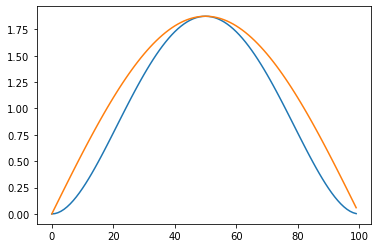

In [2]:
def fx(x):
    return 30*(x**2 - 2*x**3 + x**4)

def tx(x):
    return 1.875*(np.sin(np.pi*x))

f = [fx(i) for i in np.arange(0,1,0.01)]
t = [tx(i) for i in np.arange(0,1,0.01)]

plt.plot(f, label='f(x)')
plt.plot(t, label='t(x)')
plt.show()


2. Encontrar la función de densidad $g(x)$ según lo visto en clase. Reportar todos los cálculos realizados para encontrar dicha función usando Markdown (Latex).

$t(x)=a \sin(\pi x)$,    $g(x)=\frac{t(x)}{c}$

$c = \int_{0}^{1}t(x) dx$ = $ \int_{0}^{1}1.875 \sin(\pi x) dx$ = $\frac{15}{4\pi}$

$g(x) =$ $\frac{1.875 \sin(\pi x)}{\frac{15}{4\pi}} $

3. Usar la función encontrada en el punto 2 y utilizar el método de la transformada inversa visto en la clase 9, para generar variables aleatorias que sigan la distribución $g(x)$. **Nota:** Recuerde que el método de la transformada inversa funciona con la distribución de probabilidad acumulada y no con su densidad. Nuevamente similar al punto anterior reportar todos los cálculos usando Markdown (Latex). 